# Candidate No: 210530797

# Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor'] = 'white'

[Link](https://www.kaggle.com/datasets/slehkyi/extended-football-stats-for-european-leagues-xg?select=understat_per_game.csv) to orginal page with the dataset. Dataset used: 'understat_per_game.csv'

In this study, I am going to clusterize the variable performances by football teams with the provided set, after that the clusters will be interpreted and labeled, therefore, after further analysis we could find out the types of performances and distinctions between them

In [2]:
games = pd.read_csv(Path.cwd()/'data/understat_per_game.csv')
games

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,Serie_A,2019,h,0.448154,2.587650,0.448154,1.826350,7,6,1,...,15.500000,310,20,19.600000,294,15,Lecce,-0.551846,-0.412350,0.1597
24576,Serie_A,2019,a,1.699320,0.446679,0.938022,0.446679,5,7,1,...,12.650000,253,20,14.600000,292,20,Lecce,0.699320,-1.553321,2.4418
24577,Serie_A,2019,h,2.535110,0.959100,2.535110,0.959100,5,7,3,...,13.777778,248,18,12.888889,348,27,Lecce,-0.464890,-0.040900,-0.5675
24578,Serie_A,2019,a,2.247360,2.689270,2.247360,2.689270,11,10,2,...,25.454545,280,11,10.600000,212,20,Lecce,0.247360,-0.310730,1.1019


In [3]:
games.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object

In [4]:
len(games.columns)

29

## Preprocessing

In [5]:
games = games.drop(columns=['date', 'result', 'wins', 'draws', 'loses'])

In [6]:
X = games

In [7]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(categories=[['a', 'h']], drop='if_binary', dtype=np.int64)
X['is_h'] = onehot.fit_transform(games[['h_a']]).toarray()
X.drop(columns=['h_a'])
X['is_h']

0        1
1        0
2        1
3        0
4        1
        ..
24575    1
24576    0
24577    1
24578    0
24579    0
Name: is_h, Length: 24580, dtype: int64

In [8]:
X = games.select_dtypes(include=np.number)
X

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff,is_h
0,2014,2.570120,1.198420,2.570120,1.198420,5,4,2,1,2.3486,...,9.625000,231,24,21.850000,437,20,0.570120,0.198420,-0.6514,1
1,2014,1.503280,1.307950,1.503280,1.307950,10,1,1,1,1.5143,...,4.756098,195,41,17.695652,407,23,0.503280,0.307950,0.5143,0
2,2014,1.229870,0.310166,1.229870,0.310166,13,3,2,0,2.1588,...,5.060606,167,33,16.961538,441,26,-0.770130,0.310166,-0.8412,1
3,2014,1.035190,0.203118,1.035190,0.203118,6,2,0,0,2.1367,...,4.423077,115,26,9.446809,444,47,1.035190,0.203118,1.1367,0
4,2014,3.482860,0.402844,3.482860,0.402844,23,2,4,0,2.9287,...,4.250000,170,40,44.800000,448,10,-0.517140,0.402844,-0.0713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,2019,0.448154,2.587650,0.448154,1.826350,7,6,1,3,0.1597,...,15.500000,310,20,19.600000,294,15,-0.551846,-0.412350,0.1597,1
24576,2019,1.699320,0.446679,0.938022,0.446679,5,7,1,2,2.4418,...,12.650000,253,20,14.600000,292,20,0.699320,-1.553321,2.4418,0
24577,2019,2.535110,0.959100,2.535110,0.959100,5,7,3,1,2.4325,...,13.777778,248,18,12.888889,348,27,-0.464890,-0.040900,-0.5675,1
24578,2019,2.247360,2.689270,2.247360,2.689270,11,10,2,3,1.1019,...,25.454545,280,11,10.600000,212,20,0.247360,-0.310730,1.1019,0


## Elbow method for K-means

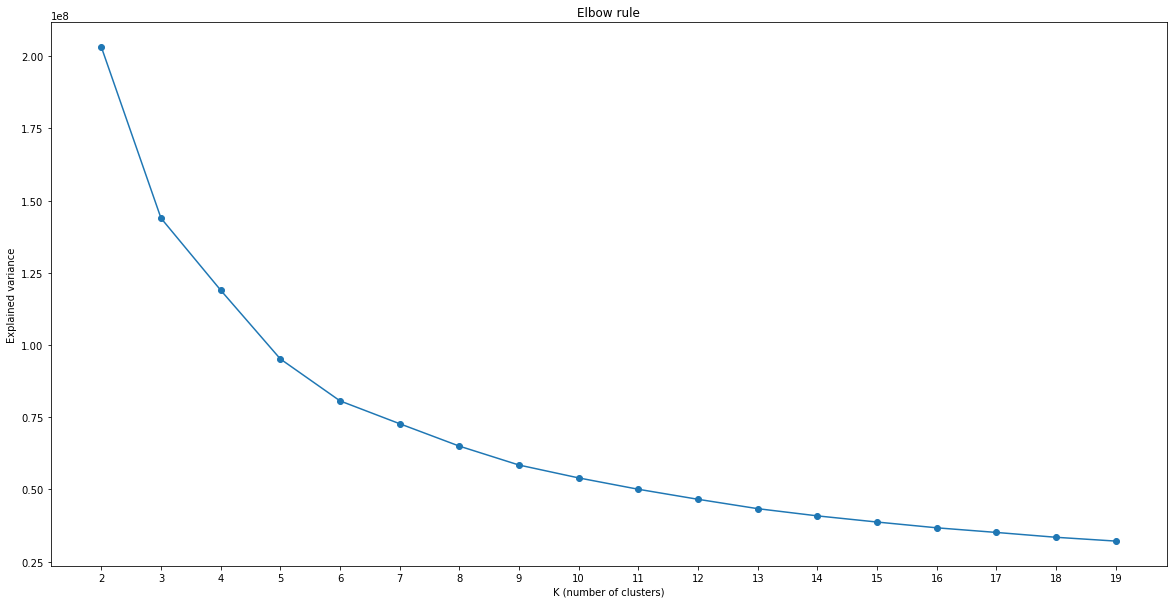

In [9]:
from sklearn.cluster import KMeans

ess = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=100)
    kmeans.fit(X)
    ess.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
plt.scatter(range(2, 20), ess)
plt.plot(range(2, 20), ess)
plt.xticks(range(2, 20))
plt.xlabel('K (number of clusters)')
plt.ylabel('Explained variance')
plt.title('Elbow rule')
plt.show()

Bend occurs at 6 so we likely have 6 clusters, especially given the fact that we have limited data without very advanced metrics, which would show differences between even more types of teams. So 6 is the optimal choice

## Modelling

In [10]:
kmeans = KMeans(
    n_clusters=6,
    max_iter=400,
    random_state=0)

In [11]:
games['cluster'] = kmeans.fit_predict(X)

In [12]:
cluster_mean_stats = games.groupby(by='cluster').mean()
cluster_mean_stats

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff,is_h
cluster,,,,,,,,,,,,,,,,,,,,,
0,2016.695111,0.937159,1.855508,0.862695,1.714513,3.638667,8.762667,0.961333,2.106667,0.855313,...,19.705620,409.694222,23.793778,8.541904,190.776000,24.157333,-0.024175,-0.251159,0.033536,0.460000
1,2016.407078,1.488642,1.114106,1.358058,1.009958,7.709606,4.104752,1.325581,1.254196,1.609377,...,7.029132,157.487563,24.144995,13.491338,290.094237,24.192113,0.163061,-0.140090,0.268022,0.541355
2,2016.668684,1.313972,1.315329,1.204306,1.205663,5.776634,5.782082,1.393261,1.393462,1.377733,...,12.121706,271.614003,24.609564,12.111750,271.483858,24.618644,-0.079289,-0.078134,-0.012097,0.499395
3,2016.406445,1.117094,1.484188,1.012153,1.354582,4.113595,7.692246,1.256999,1.321853,1.147975,...,13.445603,289.392346,24.212286,7.026923,157.318832,24.129708,-0.139905,0.162335,-0.240545,0.460222
4,2016.695166,1.855712,0.937663,1.715725,0.862666,8.765891,3.637422,2.106983,0.961952,1.936281,...,8.554641,190.884960,24.136079,19.721282,410.126679,23.804834,-0.251271,-0.024288,-0.046262,0.539391
5,2016.248184,1.246323,1.247731,1.120823,1.121514,5.313193,5.305354,1.221989,1.224092,1.366897,...,8.219777,187.321989,24.757361,8.245506,187.977820,24.767686,0.024334,0.023639,0.013933,0.499618


### Interpretation and asessment

In [13]:
print(games.columns, len(games.columns), sep='\n')

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'pts', 'npxGD', 'ppda_coef',
       'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def', 'team',
       'xG_diff', 'xGA_diff', 'xpts_diff', 'is_h', 'cluster'],
      dtype='object')
26


In [14]:
attacking_features = ['xG', 'npxG', 'deep', 'scored']
defensive_features = ['xGA','npxGA', 'deep_allowed', 'missed']
pressing_features = ['ppda_coef', 'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def']
performance_features = ['pts', 'xpts', 'npxGD', 'xG_diff','xGA_diff', 'xpts_diff', 'is_h']

In [15]:
def normalize(df): 
    inv_cols = ['xGA','npxGA', 'deep_allowed', 'missed', 'ppda_coef', 'ppda_att', 'oppda_def', 'xG_diff', 'xpts_diff']
    df = (df-df.mean())/ df.std()
    df[inv_cols] = df[inv_cols] * -1
    return df

In [16]:
normalize(cluster_mean_stats)

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff,is_h
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.914778,-1.220966,-1.663056,-1.171335,-1.688192,-1.119572,-1.436851,-1.077196,-1.888367,-1.417124,...,-1.739414,-1.700752,-1.372592,-0.631941,-0.647777,0.342762,-0.190176,-1.409586,-0.188488,-1.114054
1,-0.590861,0.508548,0.664427,0.488386,0.676325,0.908242,0.885470,-0.134817,0.317926,0.610778,...,0.951908,1.003310,-0.372222,0.417212,0.415273,0.244283,-1.507366,-0.626296,-1.624829,1.151979
2,0.776638,-0.039239,0.032729,-0.026761,0.019530,-0.054609,0.049195,0.040282,-0.042511,-0.012181,...,-0.129287,-0.220309,0.951009,0.124775,0.216078,-0.963440,0.197553,-0.189362,0.091035,-0.016767
3,-0.594168,-0.656669,-0.497372,-0.670574,-0.480247,-0.883001,-0.903165,-0.312253,0.142823,-0.630070,...,-0.410361,-0.410922,-0.180557,-0.953078,-1.005885,0.420984,0.623981,1.506500,1.490386,-1.107883
4,0.915063,1.659719,1.218333,1.686756,1.170643,1.434398,1.118470,1.886816,1.074289,1.489921,...,0.628030,0.645236,-0.397617,1.737801,1.700037,1.340864,1.407438,0.190373,0.300308,1.097283
5,-1.421450,-0.251394,0.244939,-0.306471,0.301940,-0.285458,0.286880,-0.402832,0.395840,-0.041324,...,0.699125,0.683437,1.371979,-0.694770,-0.677727,-1.385453,-0.531430,0.528372,-0.068412,-0.010558


In [17]:
ranked = normalize(cluster_mean_stats).rank(ascending=False)
ranked

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff,is_h
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,4.0,4.0,3.0,4.0,6.0,5.0,6.0
1,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,...,1.0,1.0,4.0,2.0,2.0,4.0,6.0,5.0,6.0,1.0
2,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,5.0,3.0,...,4.0,4.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,4.0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,...,5.0,5.0,3.0,6.0,6.0,2.0,2.0,1.0,1.0,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0
5,6.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,2.0,4.0,...,2.0,2.0,1.0,5.0,5.0,6.0,5.0,2.0,4.0,3.0


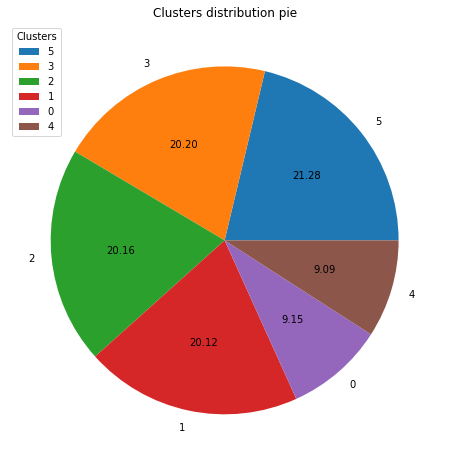

In [18]:
cluster_count = games.cluster.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cluster_count, labels=cluster_count.index, autopct='%.2f')
plt.legend(title="Clusters")
plt.title('Clusters distribution pie')
plt.show()

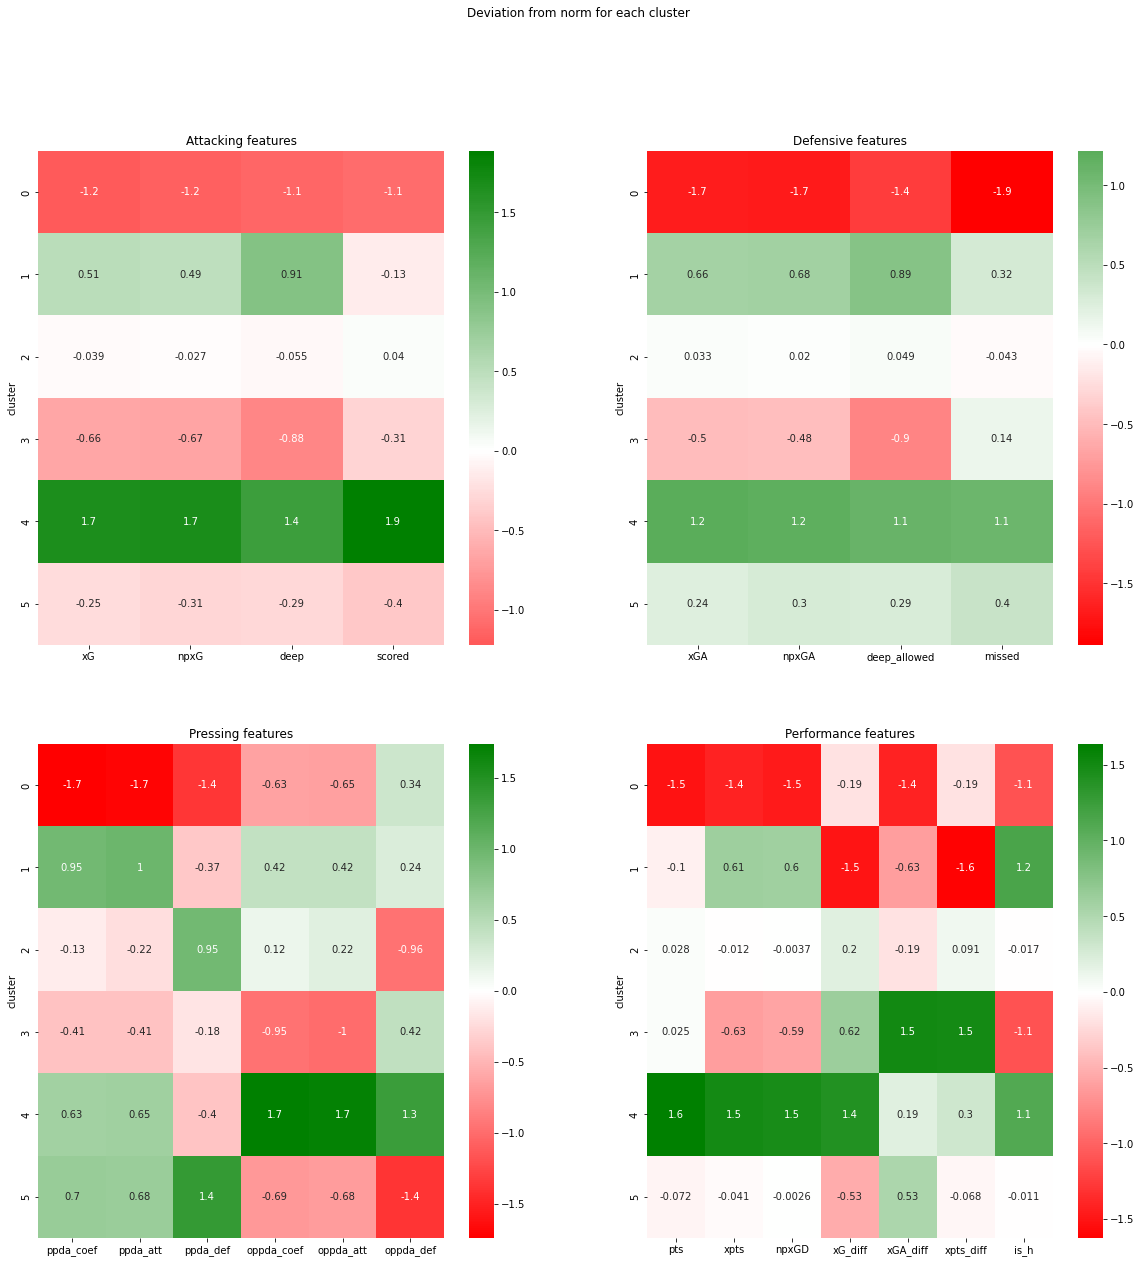

In [19]:
from matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

sns.heatmap(normalize(cluster_mean_stats)[attacking_features], ax=axs[0, 0], annot=True, cmap=cmap, center=0)
sns.heatmap(normalize(cluster_mean_stats)[defensive_features], ax=axs[0, 1], annot=True, cmap=cmap, center=0)
sns.heatmap(normalize(cluster_mean_stats)[pressing_features], ax=axs[1, 0], annot=True, cmap=cmap, center=0)
sns.heatmap(normalize(cluster_mean_stats)[performance_features], ax=axs[1, 1], annot=True, cmap=cmap, center=0)

axs[0, 0].set_title('Attacking features')
axs[0, 1].set_title('Defensive features')
axs[1, 0].set_title('Pressing features')
axs[1, 1].set_title('Performance features')
plt.suptitle("Deviation from norm for each cluster")
plt.show()

In [20]:
def cluster_val_count(team, year): return games[(games.team == team) & (games.year == year)].cluster.value_counts()

all_teams_cluster_val_count = games.groupby(by=['team', 'year']).cluster.value_counts().reset_index(name='counts')

In [21]:
all_teams_cluster_val_count[all_teams_cluster_val_count.cluster == 4].sort_values(by='counts', ascending=False).head(10)

,team,year,cluster,counts
2402,Paris Saint Germain,2015,4,37
2404,Paris Saint Germain,2016,4,31
2311,Nice,2016,4,30
2407,Paris Saint Germain,2017,4,30
2264,Napoli,2017,4,30
393,Bayern Munich,2014,4,30
2398,Paris Saint Germain,2014,4,28
2030,Manchester City,2017,4,27
360,Barcelona,2019,4,26
396,Bayern Munich,2015,4,26


The cluters from visual data we could described the clusters as follows

### Cluster 4 - All-round great performance

In [22]:
ranked.loc[4].sort_values()

year            1.0
xG_diff         1.0
oppda_def       1.0
oppda_att       1.0
oppda_coef      1.0
npxGD           1.0
xpts            1.0
missed          1.0
pts             1.0
deep_allowed    1.0
deep            1.0
npxGA           1.0
npxG            1.0
xGA             1.0
xG              1.0
scored          1.0
xpts_diff       2.0
is_h            2.0
ppda_coef       3.0
ppda_att        3.0
xGA_diff        3.0
ppda_def        5.0
Name: 4, dtype: float64

In [23]:
cluster_mean_stats.loc[4]

year            2016.695166
xG                 1.855712
xGA                0.937663
npxG               1.715725
npxGA              0.862666
deep               8.765891
deep_allowed       3.637422
scored             2.106983
missed             0.961952
xpts               1.936281
pts                1.982543
npxGD              0.853059
ppda_coef          8.554641
ppda_att         190.884960
ppda_def          24.136079
oppda_coef        19.721282
oppda_att        410.126679
oppda_def         23.804834
xG_diff           -0.251271
xGA_diff          -0.024288
xpts_diff         -0.046262
is_h               0.539391
Name: 4, dtype: float64

Cluster 4 describes a very dominant performance by the team. 

- It has the best average statistic in terms of attacking performance, ranked first in every single attacking metric (xG, npxG, deep scored) with a significant lead.

- It shows the best defensive performance, averaging the best average statistics in every defensive category (xGA, npxGA, deep_allowed, missed) 

- Such team performances show incredible ball posession control and ability to withstand pressure from the opponnent, ranking first by a a significan margin in oppda_coef, oppda_att, oppda_def

- Represents the most successful performances with the best results in terms of point accumulation, gathering the most pts, xpts, npxGD.

In [24]:
print('Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: ')
all_teams_cluster_val_count[all_teams_cluster_val_count.cluster == 4].sort_values(by='counts', ascending=False).head(10)

Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: 


,team,year,cluster,counts
2402,Paris Saint Germain,2015,4,37
2404,Paris Saint Germain,2016,4,31
2311,Nice,2016,4,30
2407,Paris Saint Germain,2017,4,30
2264,Napoli,2017,4,30
393,Bayern Munich,2014,4,30
2398,Paris Saint Germain,2014,4,28
2030,Manchester City,2017,4,27
360,Barcelona,2019,4,26
396,Bayern Munich,2015,4,26


### Cluster 0 - All-round poor performance

In [25]:
ranked.loc[0].sort_values()

year            2.0
oppda_def       3.0
xG_diff         4.0
oppda_att       4.0
oppda_coef      4.0
xpts_diff       5.0
xGA_diff        6.0
ppda_def        6.0
ppda_att        6.0
ppda_coef       6.0
npxGD           6.0
pts             6.0
missed          6.0
scored          6.0
deep_allowed    6.0
deep            6.0
npxGA           6.0
npxG            6.0
xGA             6.0
xG              6.0
xpts            6.0
is_h            6.0
Name: 0, dtype: float64

In [26]:
cluster_mean_stats.loc[0]

year            2016.695111
xG                 0.937159
xGA                1.855508
npxG               0.862695
npxGA              1.714513
deep               3.638667
deep_allowed       8.762667
scored             0.961333
missed             2.106667
xpts               0.855313
pts                0.821778
npxGD             -0.851819
ppda_coef         19.705620
ppda_att         409.694222
ppda_def          23.793778
oppda_coef         8.541904
oppda_att        190.776000
oppda_def         24.157333
xG_diff           -0.024175
xGA_diff          -0.251159
xpts_diff          0.033536
is_h               0.460000
Name: 0, dtype: float64

Cluster 0, conversely, describes a very poor performance by the team. 

- It has the worst average statistic in terms of attacking performance, ranked last in every single attacking metric (xG, npxG, deep scored) with a significant lead.

- It shows the worst defensive performance, averaging the poorest average statistics in every defensive category (xGA, npxGA, deep_allowed, missed) 

- Such team performances usually do not try to press the opponent in their half, so usually they are setting up a low block of defense and defend mostly in their own half, ranking last in ppda_def, ppda_att, ppda_coef.

- Represents the least successful performances with the worst results in terms of point accumulation, gathering the least pts, xpts, npxGD. 

In [27]:
print('Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: ')
all_teams_cluster_val_count[all_teams_cluster_val_count.cluster == 0].sort_values(by='counts', ascending=False).head(10)

Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: 


,team,year,cluster,counts
3161,Troyes,2017,0,15
1090,FC Cologne,2014,0,14
109,Angers,2018,0,13
115,Angers,2019,0,12
323,Augsburg,2016,0,12
855,Darmstadt,2016,0,12
709,Carpi,2015,0,12
103,Angers,2017,0,12
3479,Wolverhampton Wanderers,2018,0,12
2291,Newcastle United,2018,0,12


### Cluster 1 - "Unlucky" underperformers

In [28]:
ranked.loc[1].sort_values()

is_h            1.0
ppda_coef       1.0
ppda_att        1.0
xG              2.0
xGA             2.0
npxG            2.0
npxGA           2.0
deep            2.0
deep_allowed    2.0
xpts            2.0
npxGD           2.0
oppda_att       2.0
oppda_coef      2.0
scored          3.0
missed          3.0
oppda_def       4.0
year            4.0
ppda_def        4.0
xGA_diff        5.0
pts             5.0
xpts_diff       6.0
xG_diff         6.0
Name: 1, dtype: float64

In [29]:
cluster_mean_stats.loc[1]

year            2016.407078
xG                 1.488642
xGA                1.114106
npxG               1.358058
npxGA              1.009958
deep               7.709606
deep_allowed       4.104752
scored             1.325581
missed             1.254196
xpts               1.609377
pts                1.341355
npxGD              0.348100
ppda_coef          7.029132
ppda_att         157.487563
ppda_def          24.144995
oppda_coef        13.491338
oppda_att        290.094237
oppda_def         24.192113
xG_diff            0.163061
xGA_diff          -0.140090
xpts_diff          0.268022
is_h               0.541355
Name: 1, dtype: float64

Cluster 1, describes a what people would call an unlucky performance by the team. 

- It has good average stats all-round, except for perormance stats, ranking second in most of stats in attacking, defending and pressing stats, which tells that the performance is fairly good and generally is the second best.

- Despite their good performance they are ranked second last in average points accumulated which is contrary to the above statement. However, while considering performance stats notice how extreme are the negative deviations, when it comes to xG_diff and xGA_diff, which means that the team scores less than it should have based on their perofrmance and concedes more than it should have. In the long run xG_diff and xGA_diff should be 0, which means that the team is signifcantly underperformes.

In [30]:
print('Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: ')
all_teams_cluster_val_count[all_teams_cluster_val_count.cluster == 1].sort_values(by='counts', ascending=False).head(10)

Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: 


,team,year,cluster,counts
712,Celta Vigo,2014,1,23
3107,Tottenham,2017,1,22
1134,FC Krasnodar,2017,1,22
1138,FC Krasnodar,2018,1,22
2026,Manchester City,2016,1,22
2073,Marseille,2014,1,22
717,Celta Vigo,2015,1,21
2496,Real Betis,2019,1,21
2492,Real Betis,2018,1,20
347,Barcelona,2015,1,20


### Cluster 2 - Average performance

In [31]:
ranked.loc[2].sort_values()

pts             2.0
ppda_def        2.0
scored          2.0
xG_diff         3.0
oppda_att       3.0
oppda_coef      3.0
xpts_diff       3.0
xpts            3.0
year            3.0
deep            3.0
npxG            3.0
xG              3.0
deep_allowed    4.0
npxGD           4.0
ppda_coef       4.0
ppda_att        4.0
npxGA           4.0
xGA             4.0
xGA_diff        4.0
is_h            4.0
oppda_def       5.0
missed          5.0
Name: 2, dtype: float64

In [32]:
cluster_mean_stats.loc[2]

year            2016.668684
xG                 1.313972
xGA                1.315329
npxG               1.204306
npxGA              1.205663
deep               5.776634
deep_allowed       5.782082
scored             1.393261
missed             1.393462
xpts               1.377733
pts                1.389831
npxGD             -0.001357
ppda_coef         12.121706
ppda_att         271.614003
ppda_def          24.609564
oppda_coef        12.111750
oppda_att        271.483858
oppda_def         24.618644
xG_diff           -0.079289
xGA_diff          -0.078134
xpts_diff         -0.012097
is_h               0.499395
Name: 2, dtype: float64

Cluster 2, describes a fairly average performance, probably a performance expected from a mid-table team. 

- It has average stats all-around, at most of the stats the performance is ranked third or fourth 

- The only 2 significant deviations are ppda_att and oppda_att  

In [33]:
print('Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: ')
all_teams_cluster_val_count[all_teams_cluster_val_count.cluster == 2].sort_values(by='counts', ascending=False).head(10)

Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: 


,team,year,cluster,counts
1612,Inter,2017,2,19
2787,Sampdoria,2018,2,18
1499,Hertha Berlin,2015,2,18
1710,Lazio,2016,2,18
1921,Lorient,2015,2,18
3055,Torino,2015,2,18
1727,Lazio,2019,2,18
2996,Strasbourg,2018,2,17
1716,Lazio,2017,2,17
576,Brest,2019,2,17


### Cluster 3 - Overperformers

In [34]:
ranked.loc[3].sort_values()

xGA_diff        1.0
xpts_diff       1.0
xG_diff         2.0
oppda_def       2.0
pts             3.0
ppda_def        3.0
scored          4.0
missed          4.0
ppda_att        5.0
ppda_coef       5.0
npxGD           5.0
year            5.0
deep_allowed    5.0
deep            5.0
npxGA           5.0
npxG            5.0
xGA             5.0
xG              5.0
xpts            5.0
is_h            5.0
oppda_coef      6.0
oppda_att       6.0
Name: 3, dtype: float64

In [35]:
cluster_mean_stats.loc[3]

year            2016.406445
xG                 1.117094
xGA                1.484188
npxG               1.012153
npxGA              1.354582
deep               4.113595
deep_allowed       7.692246
scored             1.256999
missed             1.321853
xpts               1.147975
pts                1.388520
npxGD             -0.342429
ppda_coef         13.445603
ppda_att         289.392346
ppda_def          24.212286
oppda_coef         7.026923
oppda_att        157.318832
oppda_def         24.129708
xG_diff           -0.139905
xGA_diff           0.162335
xpts_diff         -0.240545
is_h               0.460222
Name: 3, dtype: float64

Cluster 3, describes a what people would call an undeservingly good performance by the team. 

- It has below average stats all-round, except for perormance stats, ranking second last in most of stats in attacking, defending and pressing stats, which tells that the performance is not that great and generally is the second last.

- Despite their below-par performance, they rank first at xpts_diff, which explaines why they still accumulate 1.38 pts on average which is third best. While considering performance stats notice how extreme are the positive deviations, when it comes to xG_diff, xGA_diff and xpts, which means that the team scores more than it should have based on their perofrmance and concedes less than it should have. In the long run xG_diff and xGA_diff should be 0, which means that the team is signifcantly overperformes.

In [36]:
print('Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: ')
all_teams_cluster_val_count[all_teams_cluster_val_count.cluster == 3].sort_values(by='counts', ascending=False).head(10)

Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: 


,team,year,cluster,counts
2421,Parma Calcio 1913,2018,3,27
815,Crotone,2016,3,25
3409,West Bromwich Albion,2016,3,24
705,Cardiff,2018,3,23
572,Brescia,2019,3,23
3405,West Bromwich Albion,2015,3,22
852,Darmstadt,2015,3,22
603,Burnley,2016,3,21
1381,Getafe,2017,3,21
612,Burnley,2018,3,21


### Cluster 5 - Intense and dynamic performances

In [37]:
ranked.loc[5].sort_values()

ppda_def        1.0
xGA_diff        2.0
ppda_att        2.0
ppda_coef       2.0
missed          2.0
is_h            3.0
xGA             3.0
npxGA           3.0
deep_allowed    3.0
npxGD           3.0
pts             4.0
xpts            4.0
deep            4.0
npxG            4.0
xG              4.0
xpts_diff       4.0
scored          5.0
oppda_coef      5.0
oppda_att       5.0
xG_diff         5.0
oppda_def       6.0
year            6.0
Name: 5, dtype: float64

In [38]:
cluster_mean_stats.loc[5]

year            2016.248184
xG                 1.246323
xGA                1.247731
npxG               1.120823
npxGA              1.121514
deep               5.313193
deep_allowed       5.305354
scored             1.221989
missed             1.224092
xpts               1.366897
pts                1.352964
npxGD             -0.000690
ppda_coef          8.219777
ppda_att         187.321989
ppda_def          24.757361
oppda_coef         8.245506
oppda_att        187.977820
oppda_def         24.767686
xG_diff            0.024334
xGA_diff           0.023639
xpts_diff          0.013933
is_h               0.499618
Name: 5, dtype: float64

Cluster 5 describes a dynamic defensive performance

- On average they have a below average attacking stats, with great defensive stats ranking second to third in the majority of the defensive categories. 

- They show great intensity in defense pressing their opponent, ranking first in defensive actions in the opposition half (ppda_def), and ranking first to seconf in ppda stats. Conversely, they show poor performance under the opponents pressure ranking fifth in every oppda coefficient which means that they are likely to have low ball posession.

- These teams are more defensive than the others, being able to grab points even with poor attacking performance, which they compensate with defensive intensity 

In [39]:
print('Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: ')
all_teams_cluster_val_count[all_teams_cluster_val_count.cluster == 5].sort_values(by='counts', ascending=False).head(10)

Here are the teams which are the best described by this cluster with the most performances belonging to the cluster during the year: 


,team,year,cluster,counts
945,Eibar,2018,5,26
2529,Real Sociedad,2014,5,24
1181,FC Rostov,2019,5,23
1809,Levante,2018,5,23
1992,Malaga,2014,5,23
1418,Granada,2019,5,22
3124,Toulouse,2014,5,22
2360,Osasuna,2019,5,22
1996,Malaga,2015,5,22
1388,Getafe,2019,5,21


# Regression

In [40]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='Another-Dataset-on-used-Fiat-500-(1538-rows)')

[Link](https://www.openml.org/search?type=data&status=active&id=43828) to orginal page with the dataset

In [41]:
print(data.DESCR)

This dataset has been created from a query done on an website specialized in used cars and contains 1538 rows
Description of colums:
model: Fiat 500 comes in several 'flavours' :'pop', 'lounge', 'sport'
engine_power: number of Kw of the engine
ageindays: age of the car in number of days (from the time the dataset has been created)
km: kilometers of the car
previous_owners: number of previous owners
lat: latitude of the seller (the price of cars in Italy varies from North to South of the country)
lon: longitude of the seller (the price of cars in Italy varies from North to South of the country)
price: selling price (the target)
I collected this dataset to train myself and test regression algorithms. Hope this can help people to train as well.

Downloaded from openml.org.


In [42]:
data.feature_names

['model', 'engine_power', 'age_in_days', 'km', 'previous_owners', 'lat', 'lon']

## EDA

In [43]:
fiat500 = data.data
fiat500['price'] = data.target
fiat500

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,lounge,51.0,882.0,25000.0,1.0,44.907242,8.611560,8900.0
1,pop,51.0,1186.0,32500.0,1.0,45.666359,12.241890,8800.0
2,sport,74.0,4658.0,142228.0,1.0,45.503300,11.417840,4200.0
3,lounge,51.0,2739.0,160000.0,1.0,40.633171,17.634609,6000.0
4,pop,73.0,3074.0,106880.0,1.0,41.903221,12.495650,5700.0
...,...,...,...,...,...,...,...,...
1533,sport,51.0,3712.0,115280.0,1.0,45.069679,7.704920,5200.0
1534,lounge,74.0,3835.0,112000.0,1.0,45.845692,8.666870,4600.0
1535,pop,51.0,2223.0,60457.0,1.0,45.481541,9.413480,7500.0
1536,lounge,51.0,2557.0,80750.0,1.0,45.000702,7.682270,5990.0


In [44]:
fiat500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            1538 non-null   object 
 1   engine_power     1538 non-null   float64
 2   age_in_days      1538 non-null   float64
 3   km               1538 non-null   float64
 4   previous_owners  1538 non-null   float64
 5   lat              1538 non-null   float64
 6   lon              1538 non-null   float64
 7   price            1538 non-null   float64
dtypes: float64(7), object(1)
memory usage: 96.2+ KB


In [45]:
fiat500.describe()

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


<AxesSubplot:xlabel='model', ylabel='Count'>

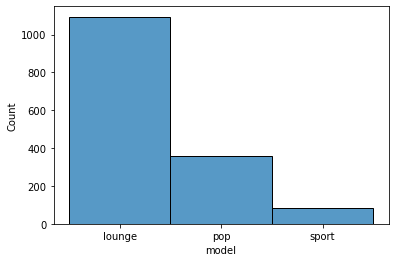

In [46]:
sns.histplot(fiat500.model)

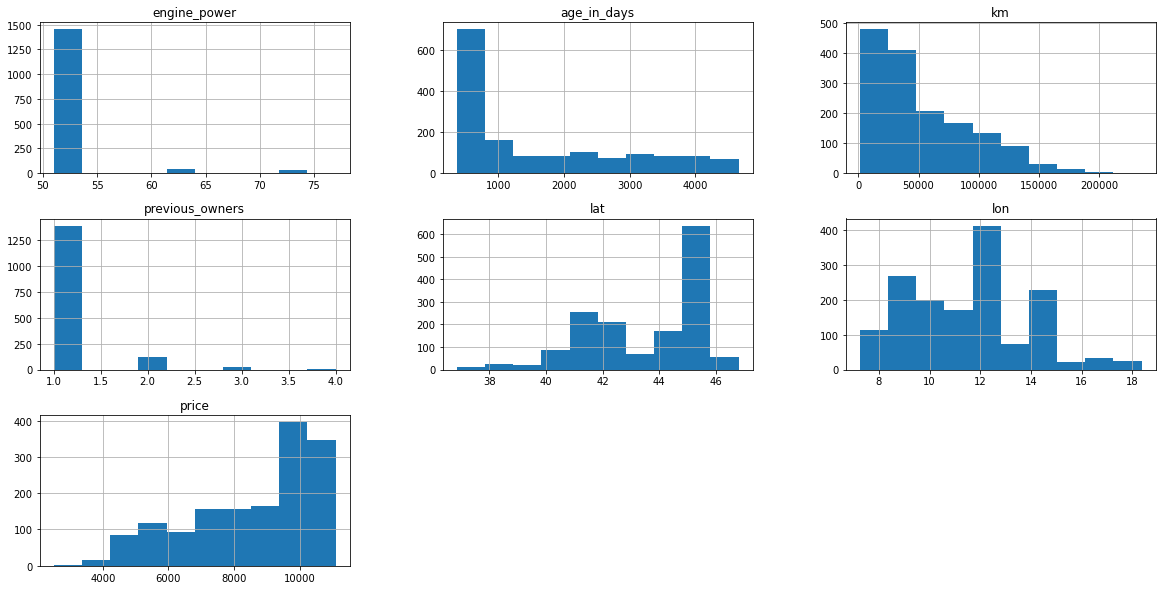

In [47]:
fiat500.hist(figsize=(20, 10));

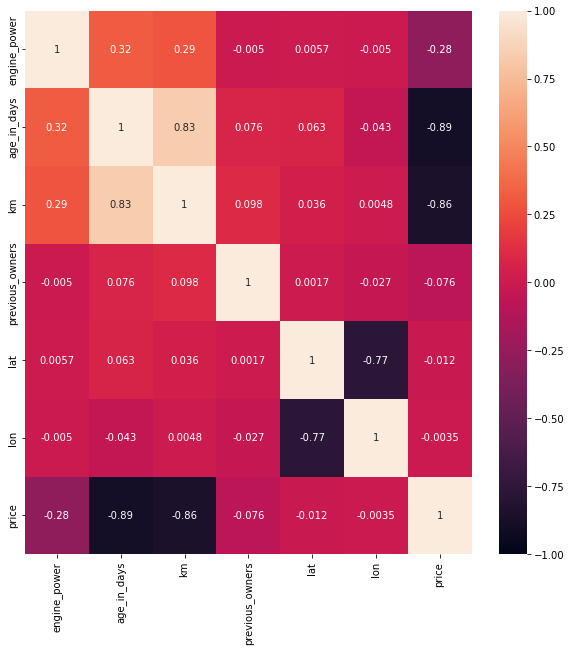

In [48]:
plt.figure(figsize=(10, 10))
sns.heatmap(fiat500.corr(), annot=True, vmin=-1, vmax=1);

## Preprocessing

In [49]:
onehot = OneHotEncoder(categories=[fiat500.model.unique()], dtype=np.int64)
model_encoded = pd.DataFrame(onehot.fit_transform(fiat500[['model']]).toarray(), columns=fiat500.model.unique())
fiat500 = pd.concat([model_encoded, fiat500], axis=1).drop(columns=['model'])
fiat500

,lounge,pop,sport,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,0,0,51.0,882.0,25000.0,1.0,44.907242,8.611560,8900.0
1,0,1,0,51.0,1186.0,32500.0,1.0,45.666359,12.241890,8800.0
2,0,0,1,74.0,4658.0,142228.0,1.0,45.503300,11.417840,4200.0
3,1,0,0,51.0,2739.0,160000.0,1.0,40.633171,17.634609,6000.0
4,0,1,0,73.0,3074.0,106880.0,1.0,41.903221,12.495650,5700.0
...,...,...,...,...,...,...,...,...,...,...
1533,0,0,1,51.0,3712.0,115280.0,1.0,45.069679,7.704920,5200.0
1534,1,0,0,74.0,3835.0,112000.0,1.0,45.845692,8.666870,4600.0
1535,0,1,0,51.0,2223.0,60457.0,1.0,45.481541,9.413480,7500.0
1536,1,0,0,51.0,2557.0,80750.0,1.0,45.000702,7.682270,5990.0


In [50]:
fiat500['km_per_day'] = fiat500.km / fiat500.age_in_days
fiat500 = fiat500.drop(columns=['age_in_days'])

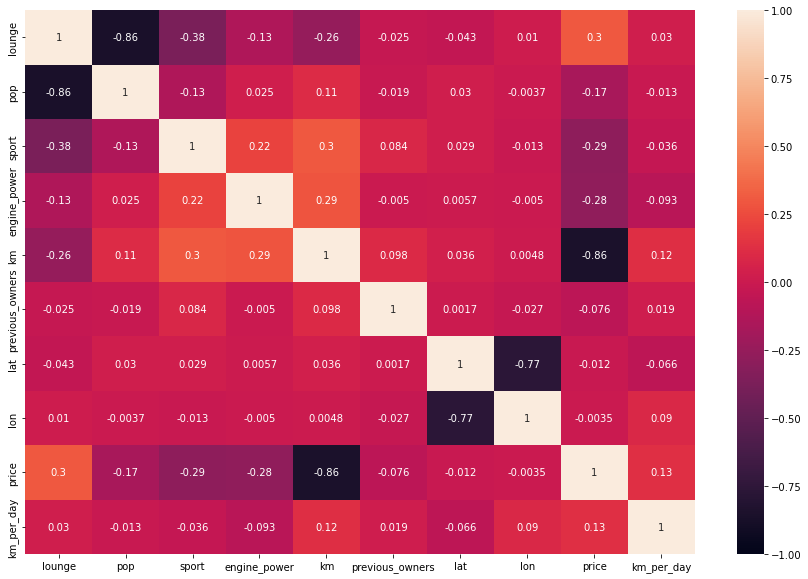

In [51]:
plt.figure(figsize=(15, 10))
sns.heatmap(fiat500.corr(), annot=True, vmin=-1, vmax=1);

## Modelling

In [52]:
from sklearn.model_selection import train_test_split

X, y = fiat500[['lounge', 'pop', 'sport', 'engine_power', 'km', 'previous_owners', 'lat', 'lon', 'km_per_day']], fiat500.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Cross Validation score of models scored by average 5-fold MAE score
cvs = {}

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

reg = LinearRegression()
reg.fit(X_train, y_train)
cvs['LinearRegression'] = -np.mean(cross_val_score(reg, X_test, y_test, cv=5, scoring='neg_mean_absolute_error'))

### Lasso

In [55]:
lasso = Lasso(random_state=0)
params_lasso_ridge = {
    'alpha' : [0.1, 0.2, 0.5, 1, 2, 5]
}
gs_lasso = GridSearchCV(lasso, params_lasso_ridge, scoring='neg_mean_absolute_error').fit(X_train, y_train)
print(f'best params: {gs_lasso.best_params_}')
print(f'best score: {gs_lasso.best_score_}')


best params: {'alpha': 2}
best score: -679.3718135420079


In [56]:
gs_lasso.cv_results_['params']
# gs_lasso.cv_results_['mean_test_score']

[{'alpha': 0.1},
 {'alpha': 0.2},
 {'alpha': 0.5},
 {'alpha': 1},
 {'alpha': 2},
 {'alpha': 5}]

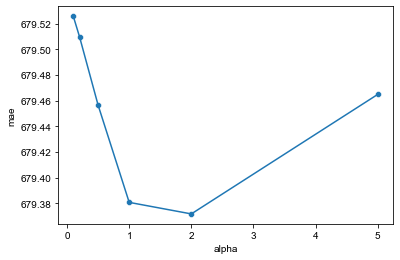

In [57]:
sns.scatterplot(x=[i['alpha'] for i in gs_lasso.cv_results_['params']], y=-gs_lasso.cv_results_['mean_test_score'])
sns.lineplot(x=[i['alpha'] for i in gs_lasso.cv_results_['params']], y=-gs_lasso.cv_results_['mean_test_score'])

sns.set()
plt.xlabel('alpha')
plt.ylabel('mae')
plt.show()

In [58]:
lasso = Lasso(alpha=2, random_state=0)
lasso.fit(X_train, y_train)
cvs['Lasso'] = -np.mean(cross_val_score(lasso, X_test, y_test, cv=5, scoring='neg_mean_absolute_error'))

### Ridge

In [59]:
ridge = Ridge(random_state=0)
gs_ridge = GridSearchCV(ridge, params_lasso_ridge, scoring='neg_mean_absolute_error').fit(X_train, y_train)
print(f'best params: {gs_ridge.best_params_}')
print(f'best score: {gs_ridge.best_score_}')

best params: {'alpha': 5}
best score: -679.4285075856942


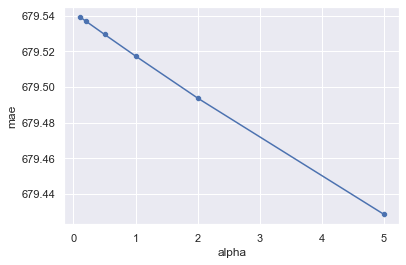

In [60]:
sns.scatterplot(x=[i['alpha'] for i in gs_ridge.cv_results_['params']], y=-gs_ridge.cv_results_['mean_test_score'])
sns.lineplot(x=[i['alpha'] for i in gs_ridge.cv_results_['params']], y=-gs_ridge.cv_results_['mean_test_score'])

sns.set()
plt.xlabel('alpha')
plt.ylabel('mae')
plt.show()

In [61]:
lasso = Ridge(alpha=5, random_state=0)
lasso.fit(X_train, y_train)
cvs['Ridge'] = -np.mean(cross_val_score(lasso, X_test, y_test, cv=5, scoring='neg_mean_absolute_error'))

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

random_forest = RandomForestRegressor(random_state=0)
params_rf = {
    'n_estimators' : [10, 25, 100, 150, 200]
}
gs_rf = GridSearchCV(random_forest, params_rf, scoring='neg_mean_absolute_error').fit(X_train, y_train)
print(f'best params: {gs_rf.best_params_}')
print(f'best score: {gs_rf.best_score_}')

best params: {'n_estimators': 150}
best score: -584.1986898143364


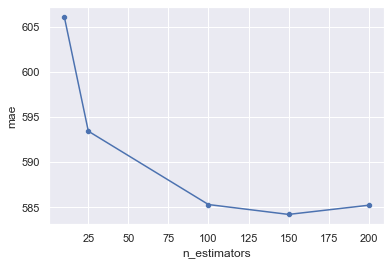

In [63]:
sns.scatterplot(x=[i['n_estimators'] for i in gs_rf.cv_results_['params']], y=-gs_rf.cv_results_['mean_test_score'])
sns.lineplot(x=[i['n_estimators'] for i in gs_rf.cv_results_['params']], y=-gs_rf.cv_results_['mean_test_score'])

sns.set()
plt.xlabel('n_estimators')
plt.ylabel('mae')
plt.show()

In [64]:
random_forest = RandomForestRegressor(n_estimators=150, random_state=0)
random_forest.fit(X_train, y_train)
cvs['RandomForest'] = -np.mean(cross_val_score(random_forest, X_test, y_test, cv=5, scoring='neg_mean_absolute_error'))

### Gradient Boosting

In [65]:
gboost = GradientBoostingRegressor(random_state=0)
params_gb = {

    'learning_rate' : [0.1, 0.2, 0.5, 1],
    'n_estimators' : [100, 150, 200]
}
gs_gb = GridSearchCV(gboost, params_gb, scoring='neg_mean_absolute_error').fit(X_train, y_train)
print(f'best params: {gs_gb.best_params_}')
print(f'best score: {gs_gb.best_score_}')

best params: {'learning_rate': 0.1, 'n_estimators': 200}
best score: -589.4564190207436


In [66]:
gboost = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, random_state=0)
gboost.fit(X_train, y_train)
cvs['GradientBoosting'] = -np.mean(cross_val_score(gboost, X_test, y_test, cv=5, scoring='neg_mean_absolute_error'))

In [67]:
scores = pd.DataFrame.from_dict(cvs, orient='index', columns=['score'])
scores.to_csv(path_or_buf=Path.cwd()/'regression_scores.csv')

From the above modelling the best model seems to be Random Forest regressor, because we have it has the lowest average MAE score on 5-fold cross-validated unseen data.

# Classification

In [68]:
data = fetch_openml(name='heart-statlog')

[Link](https://www.openml.org/search?type=data&sort=runs&id=53&status=active) to orginal page with the dataset

In [69]:
print(data.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

This database contains 13 attributes (which have been extracted from
 a larger set of 75)       
   
 
 
 Attribute Information:
 ------------------------
       -- 1. age       
       -- 2. sex       
       -- 3. chest pain type  (4 values)       
       -- 4. resting blood pressure  
       -- 5. serum cholestoral in mg/dl      
       -- 6. fasting blood sugar > 120 mg/dl       
       -- 7. resting electrocardiographic results  (values 0,1,2) 
       -- 8. maximum heart rate achieved  
       -- 9. exercise induced angina    
       -- 10. oldpeak = ST depression induced by exercise relative to rest   
       -- 11. the slope of the peak exercise ST segment     
       -- 12. number of major vessels (0-3) colored by flourosopy        
       -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     
 
 Attributes types
 -----------------
 
 Real: 1,4,5,8,10,12
 Ordered:11,
 Binary: 2,6,9
 Nominal:7,3,13
 
 V

In [70]:
heart_disease = data.data
heart_disease['disease_presence'] = data.target
heart_disease

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,disease_presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,present
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,absent
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,present
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,absent
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,absent
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,absent
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,absent
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,absent


## EDA

In [71]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    float64 
 1   sex                                   270 non-null    float64 
 2   chest                                 270 non-null    float64 
 3   resting_blood_pressure                270 non-null    float64 
 4   serum_cholestoral                     270 non-null    float64 
 5   fasting_blood_sugar                   270 non-null    float64 
 6   resting_electrocardiographic_results  270 non-null    float64 
 7   maximum_heart_rate_achieved           270 non-null    float64 
 8   exercise_induced_angina               270 non-null    float64 
 9   oldpeak                               270 non-null    float64 
 10  slope                                 270 non-null    float64 
 11  number

In [72]:
heart_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
resting_blood_pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fasting_blood_sugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
resting_electrocardiographic_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
maximum_heart_rate_achieved,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise_induced_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [73]:
unique = heart_disease.nunique()
unique

age                                      41
sex                                       2
chest                                     4
resting_blood_pressure                   47
serum_cholestoral                       144
fasting_blood_sugar                       2
resting_electrocardiographic_results      3
maximum_heart_rate_achieved              90
exercise_induced_angina                   2
oldpeak                                  39
slope                                     3
number_of_major_vessels                   4
thal                                      3
disease_presence                          2
dtype: int64

In [74]:
categorical_features = unique[unique < 5].index.values.tolist()
numerical_features = unique[unique >= 5].index.values.tolist()
print(categorical_features, numerical_features, sep='\n')

['sex', 'chest', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal', 'disease_presence']
['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']


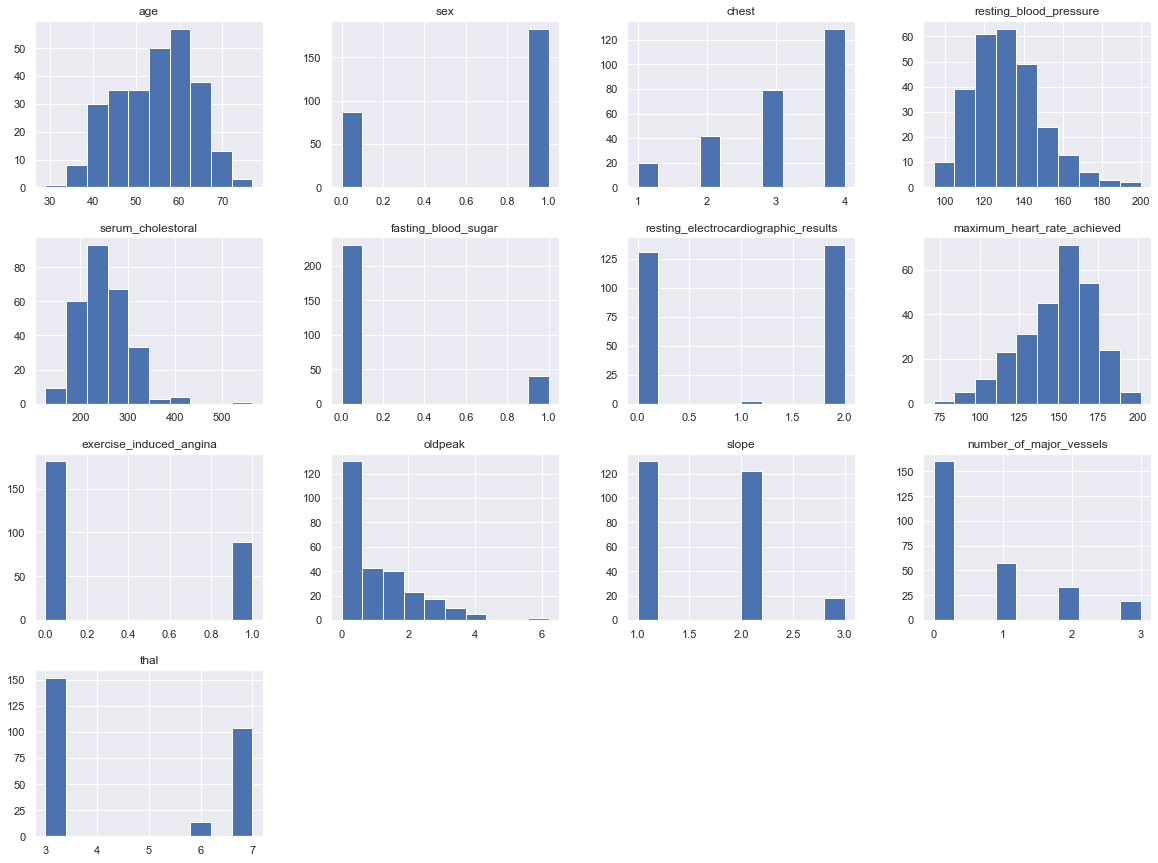

In [75]:
heart_disease.hist(figsize=(20, 15));

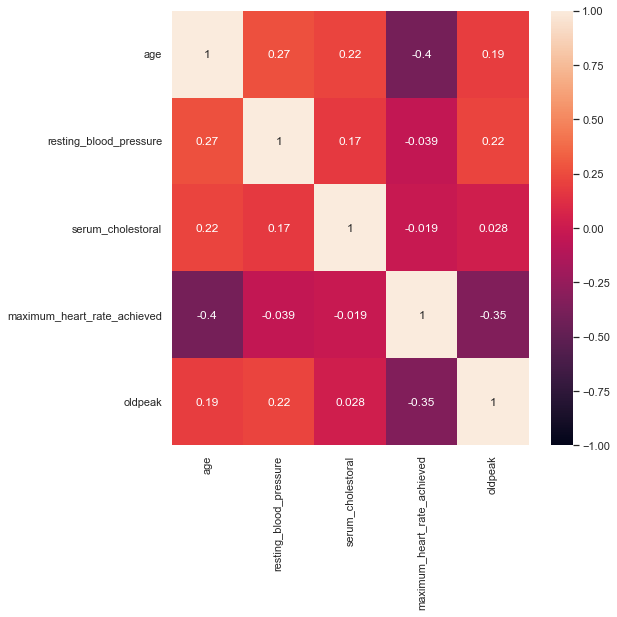

In [76]:
plt.figure(figsize=(8, 8))
sns.heatmap(heart_disease[numerical_features].corr(), annot=True, vmin=-1, vmax=1);

A lot of features are correlated which means that regression is not efficient in this problem as other classification methods

## Preprocessing

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heart_disease['disease_presence'] = le.fit_transform(heart_disease.disease_presence)
heart_disease

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,disease_presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [78]:
heart_disease.disease_presence.value_counts()

0    150
1    120
Name: disease_presence, dtype: int64

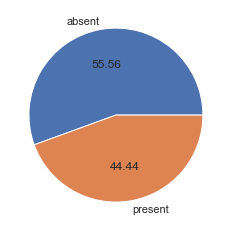

In [79]:
plt.pie(heart_disease.disease_presence.value_counts(), labels=['absent', 'present'], autopct='%.2f');

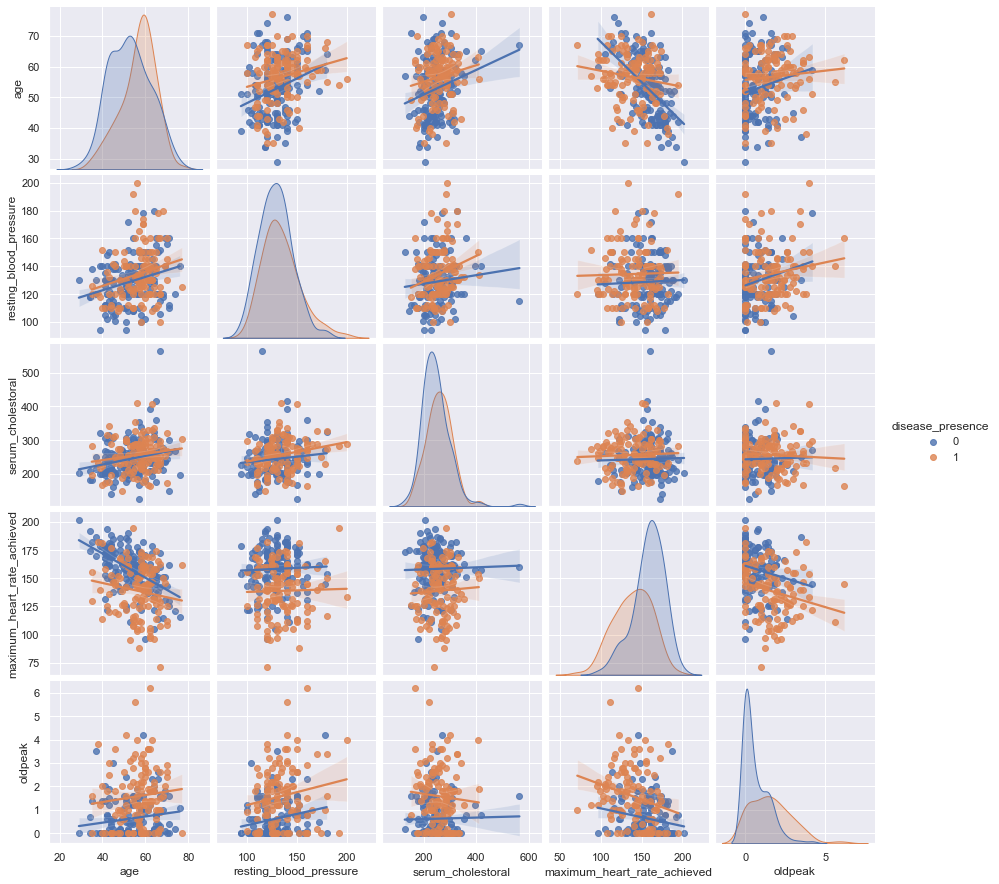

In [80]:
sns.pairplot(data=heart_disease[numerical_features+ ['disease_presence']], hue='disease_presence', kind='reg');

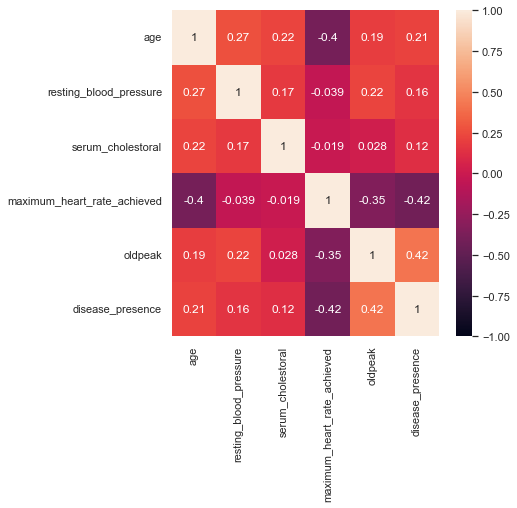

In [81]:
plt.figure(figsize=(6, 6))
sns.heatmap(heart_disease[numerical_features+ ['disease_presence']].corr(), annot=True, vmin=-1, vmax=1);

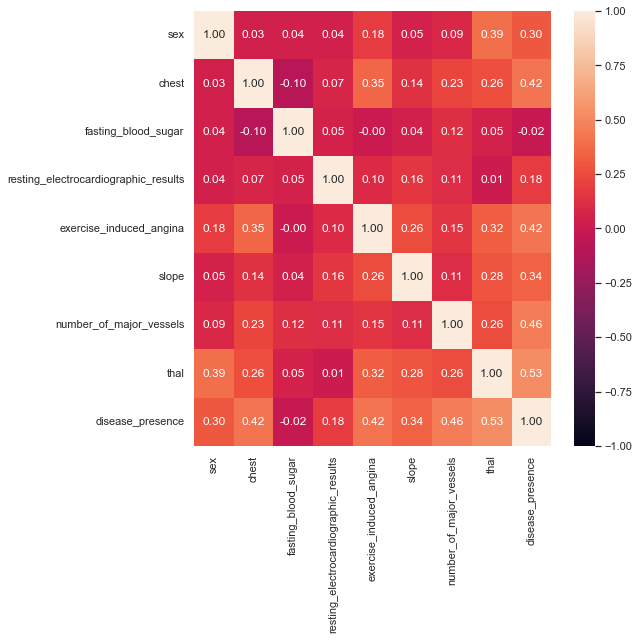

In [82]:
plt.figure(figsize=(8, 8))
sns.heatmap(heart_disease[categorical_features].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f');

## Modelling

### Decision Tree

In [83]:
X, y = heart_disease[categorical_features+numerical_features], heart_disease.disease_presence

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
# Cross Validation score of models scored by average 5-fold MAE score
cvs = {}

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
cvs['LogisticRegression'] = np.mean(cross_val_score(lr, X_test, y_test, cv=5, scoring='accuracy'))

/Users/timurkambachekov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/timurkambachekov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [86]:
cross_val_score(lr, X_test, y_test, cv=5, scoring='accuracy')

/Users/timurkambachekov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/timurkambachekov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

array([0.94117647, 1.        , 0.9375    , 0.9375    , 1.        ])

In [87]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
cvs['DecisionTree'] = np.mean(cross_val_score(tree, X_test, y_test, cv=5, scoring='accuracy'))

In [88]:
cross_val_score(tree, X_test, y_test, cv=5, scoring='accuracy')

array([1., 1., 1., 1., 1.])

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
cvs['GradienBoosting'] = np.mean(cross_val_score(gbc, X_test, y_test, cv=5, scoring='accuracy'))

In [90]:
class_scores = pd.DataFrame.from_dict(cvs, orient='index', columns=['score'])
class_scores.to_csv(path_or_buf=Path.cwd()/'classification_scores.csv')